In [5]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [2]:
from pyspark import SparkContext

In [3]:
sc = SparkContext(master='local',appName='Buoi3')

In [8]:
sql_context = SQLContext(sc)

In [6]:
spark = (SparkSession
        .builder
        .appName('Session Spark App')
        .getOrCreate())

In [7]:
from pyspark.sql import Row, SQLContext

## Read data from RDD

In [9]:
lst = [('Vuong',1993),('Hieu',1993),('Hoang',1992),('Danh',1986)]

In [10]:
RDD = sc.parallelize(lst)

In [11]:
danhsach = RDD.map(lambda x: Row(name = x[0],year = x[1]))

In [12]:
table = sql_context.createDataFrame(danhsach)

In [13]:
table.show()

+-----+----+
| name|year|
+-----+----+
|Vuong|1993|
| Hieu|1993|
|Hoang|1992|
| Danh|1986|
+-----+----+



In [14]:
table

DataFrame[name: string, year: bigint]

## Read data from HDFS

In [18]:
file_name = 'hdfs://bigdata.laptrinhpython.net:19000/people.csv'

In [19]:
people = spark.read.csv(file_name,inferSchema=True,header=True)

In [20]:
people.show()

+---+---------+-----------------+------+-------------+
|_c0|person_id|             name|   sex|date of birth|
+---+---------+-----------------+------+-------------+
|  0|      100|   Penelope Lewis|female|   1990-08-31|
|  1|      101|    David Anthony|  male|   1971-10-14|
|  2|      102|        Ida Shipp|female|   1962-05-24|
|  3|      103|     Joanna Moore|female|   2017-03-10|
|  4|      104|   Lisandra Ortiz|female|   2020-08-05|
|  5|      105|    David Simmons|  male|   1999-12-30|
|  6|      106|    Edward Hudson|  male|   1983-05-09|
|  7|      107|     Albert Jones|  male|   1990-09-13|
|  8|      108| Leonard Cavender|  male|   1958-08-08|
|  9|      109|   Everett Vadala|  male|   2005-05-24|
| 10|      110| Freddie Claridge|  male|   2002-05-07|
| 11|      111|Annabelle Rosseau|female|   1989-07-13|
| 12|      112|    Eulah Emanuel|female|   1976-01-19|
| 13|      113|       Shaun Love|  male|   1970-05-26|
| 14|      114|Alejandro Brennan|  male|   1980-12-22|
| 15|     

In [21]:
people

DataFrame[_c0: int, person_id: int, name: string, sex: string, date of birth: string]

## Read data from JSON

In [22]:
file_name = 'hdfs://bigdata.laptrinhpython.net:19000/data.json'

In [23]:
data = spark.read.json(file_name)
data.show(5)

+----------+--------------------+-------------+--------------------+--------------------+-------------------+
|        id|            location|sampling_rate|              sensor|    sensordatavalues|          timestamp|
+----------+--------------------+-------------+--------------------+--------------------+-------------------+
|5810744647|[112.6, FR, 0, 11...|         null|[22349, 1, [14, N...|[[12340422762, 1....|2019-12-20 03:22:01|
|5810744646|[35.2, DE, 0, 107...|         null|[21149, 7, [9, va...|[[12340422760, 9....|2019-12-20 03:22:01|
|5810744645|[51.0, DE, 0, 293...|         null|[5811, 1, [14, No...|[[12340422757, 6....|2019-12-20 03:22:01|
|5810744644|[34.4, BE, 0, 441...|         null|[8765, 1, [14, No...|[[12340422756, 3....|2019-12-20 03:22:01|
|5810744643|[5.0, FR, 0, 1100...|         null|[21693, 1, [14, N...|[[12340422754, 7....|2019-12-20 03:22:01|
+----------+--------------------+-------------+--------------------+--------------------+-------------------+
only showi

In [24]:
data.printSchema()

root
 |-- id: long (nullable = true)
 |-- location: struct (nullable = true)
 |    |-- altitude: string (nullable = true)
 |    |-- country: string (nullable = true)
 |    |-- exact_location: long (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- indoor: long (nullable = true)
 |    |-- latitude: string (nullable = true)
 |    |-- longitude: string (nullable = true)
 |-- sampling_rate: string (nullable = true)
 |-- sensor: struct (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- pin: string (nullable = true)
 |    |-- sensor_type: struct (nullable = true)
 |    |    |-- id: long (nullable = true)
 |    |    |-- manufacturer: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |-- sensordatavalues: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- id: long (nullable = true)
 |    |    |-- value: string (nullable = true)
 |    |    |-- value_type: string (nullable = true)
 |-- timestamp: string (nullab

In [28]:
df = spark.read.csv('Obesity_data.csv',inferSchema=True,header=True)

In [30]:
df.show(5)

+---+------+------+------+----+---+----+----+-----+-----+-----+
| id|gender|height|weight| bmi|age| bmc| bmd|  fat| lean|pcfat|
+---+------+------+------+----+---+----+----+-----+-----+-----+
|  1|     F|   150|    49|21.8| 53|1312|0.88|17802|28600| 37.3|
|  2|     M|   165|    52|19.1| 65|1309|0.84| 8381|40229| 16.8|
|  3|     F|   157|    57|23.1| 64|1230|0.84|19221|36057| 34.0|
|  4|     F|   156|    53|21.8| 56|1171| 0.8|17472|33094| 33.8|
|  5|     M|   160|    51|19.9| 54|1681|0.98| 7336|40621| 14.8|
+---+------+------+------+----+---+----+----+-----+-----+-----+
only showing top 5 rows



In [29]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- bmc: integer (nullable = true)
 |-- bmd: double (nullable = true)
 |-- fat: integer (nullable = true)
 |-- lean: integer (nullable = true)
 |-- pcfat: double (nullable = true)



In [31]:
df.count()

1217

In [34]:
df.describe('height','bmi').show()

+-------+------------------+------------------+
|summary|            height|               bmi|
+-------+------------------+------------------+
|  count|              1217|              1217|
|   mean| 156.7239112571898| 22.39539852095314|
| stddev|7.9777256820417035|3.0564419447471356|
|    min|               136|              14.5|
|    max|               185|              37.1|
+-------+------------------+------------------+



In [36]:
df.describe('height','bmi').toPandas() # Giao diện đẹp hơn show

,summary,height,bmi
0,count,1217,1217
1,mean,156.7239112571898,22.39539852095314
2,stddev,7.9777256820417035,3.0564419447471356
3,min,136,14.5
4,max,185,37.1


In [80]:
#truy vấn cột theo ý muốn:
df_sub = df.select('id','gender','height','weight')
df_sub.show(3)

+---+------+------+------+
| id|gender|height|weight|
+---+------+------+------+
|  1|     F|   150|    49|
|  2|     M|   165|    52|
|  3|     F|   157|    57|
+---+------+------+------+
only showing top 3 rows



In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
#crosstab
gender_height = df_sub.crosstab('height','gender').toPandas()
gender_height.head()

,height_gender,F,M
0,138,2,0
1,170,1,24
2,142,11,0
3,153,73,1
4,174,0,2


c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


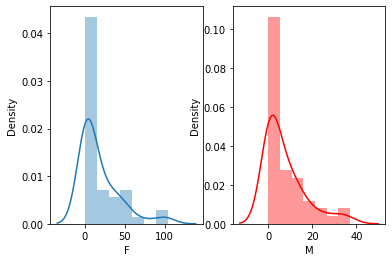

In [89]:
plt.subplot(1,2,1)
sns.distplot(gender_height['F'])
plt.subplot(1,2,2)
sns.distplot(gender_height['M'],color ='r');

In [79]:
df_sub.groupby('gender').agg({'height':'mean'}).show()

+------+------------------+
|gender|       avg(height)|
+------+------------------+
|     F|153.29118329466357|
|     M|165.05915492957746|
+------+------------------+



In [87]:
df_sub.groupby('gender').agg({'height':'min','weight':'min'}).show()

+------+-----------+-----------+
|gender|min(weight)|min(height)|
+------+-----------+-----------+
|     F|         34|        136|
|     M|         38|        146|
+------+-----------+-----------+



In [90]:
df_sub.select('gender').distinct().show()

+------+
|gender|
+------+
|     F|
|     M|
+------+



In [94]:
df_sub.select('height').distinct().count()

48

In [95]:
df_sub.select('weight').distinct().count()

55

In [99]:
df.select('age').orderBy(df.age.asc()).show(3)

+---+
|age|
+---+
| 13|
| 14|
| 14|
+---+
only showing top 3 rows



In [100]:
df.select('age').orderBy(df.age.desc()).show(3)

+---+
|age|
+---+
| 88|
| 87|
| 85|
+---+
only showing top 3 rows



In [107]:
df.select('age').sort(df.age).show(5)

+---+
|age|
+---+
| 13|
| 14|
| 14|
| 14|
| 14|
+---+
only showing top 5 rows



### Tạo cột mới:

In [111]:
df_sub = df_sub.withColumn('bmi',(df_sub.weight/(df_sub.height/100)**2))

In [112]:
df_sub.show(5)

+---+------+------+------+------------------+
| id|gender|height|weight|               bmi|
+---+------+------+------+------------------+
|  1|     F|   150|    49| 21.77777777777778|
|  2|     M|   165|    52|19.100091827364558|
|  3|     F|   157|    57|23.124670372023203|
|  4|     F|   156|    53|  21.7784352399737|
|  5|     M|   160|    51|19.921874999999996|
+---+------+------+------+------------------+
only showing top 5 rows



### Đổi tên cột

In [113]:
df_sub.withColumnRenamed('gender','sex').show(3)

+---+---+------+------+------------------+
| id|sex|height|weight|               bmi|
+---+---+------+------+------------------+
|  1|  F|   150|    49| 21.77777777777778|
|  2|  M|   165|    52|19.100091827364558|
|  3|  F|   157|    57|23.124670372023203|
+---+---+------+------+------------------+
only showing top 3 rows



### Xóa cột

In [114]:
df.show(3)

+---+------+------+------+----+---+----+----+-----+-----+-----+
| id|gender|height|weight| bmi|age| bmc| bmd|  fat| lean|pcfat|
+---+------+------+------+----+---+----+----+-----+-----+-----+
|  1|     F|   150|    49|21.8| 53|1312|0.88|17802|28600| 37.3|
|  2|     M|   165|    52|19.1| 65|1309|0.84| 8381|40229| 16.8|
|  3|     F|   157|    57|23.1| 64|1230|0.84|19221|36057| 34.0|
+---+------+------+------+----+---+----+----+-----+-----+-----+
only showing top 3 rows



In [117]:
df.drop('bmi','lean').show(3)

+---+------+------+------+---+----+----+-----+-----+
| id|gender|height|weight|age| bmc| bmd|  fat|pcfat|
+---+------+------+------+---+----+----+-----+-----+
|  1|     F|   150|    49| 53|1312|0.88|17802| 37.3|
|  2|     M|   165|    52| 65|1309|0.84| 8381| 16.8|
|  3|     F|   157|    57| 64|1230|0.84|19221| 34.0|
+---+------+------+------+---+----+----+-----+-----+
only showing top 3 rows



In [122]:
df.columns

['id',
 'gender',
 'height',
 'weight',
 'bmi',
 'age',
 'bmc',
 'bmd',
 'fat',
 'lean',
 'pcfat']

In [123]:
people.count()

100000

In [124]:
people.dropna().count()

98080

### Lọc dữ liệu

In [126]:
people.filter(people.name.like('V%g')).show(5)

+-----+---------+-----------------+------+-------------+
|  _c0|person_id|             name|   sex|date of birth|
+-----+---------+-----------------+------+-------------+
| 1394|     1494| Vernon Steinberg|  male|   1976-03-31|
| 8235|     8335|Veronica Revering|female|   2026-12-24|
|11524|    11624|  Velda Creveling|female|   1998-06-14|
|12287|    12387|       Verna King|female|   1982-03-20|
|13458|    13558|     Vivian Young|female|   1928-04-08|
+-----+---------+-----------------+------+-------------+
only showing top 5 rows



In [143]:
people.filter(people.name.like('%na%')).count()

6075

In [141]:
people.where(people.name.contains('na')).count()

6075

In [146]:
people.filter((people['date of birth'] >= '1999-01-01') & (people['date of birth'] <= '1999-12-31')).show()

+----+---------+------------------+------+-------------+
| _c0|person_id|              name|   sex|date of birth|
+----+---------+------------------+------+-------------+
|   5|      105|     David Simmons|  male|   1999-12-30|
|  77|      177|     Frances Myers|female|   1999-09-25|
| 114|      214|     Mary Mininger|female|   1999-07-03|
| 287|      387|   Bella Dickinson|female|   1999-04-23|
| 329|      429|Charles Schlarbaum|  male|   1999-07-16|
| 403|      503|     Deborah Souza|female|   1999-01-06|
| 467|      567| William Sylvestre|  male|   1999-04-17|
| 544|      644|         John Bono|  male|   1999-07-20|
| 556|      656|       Susan Brund|female|   1999-10-25|
| 565|      665|      Kelly Aleman|female|   1999-01-20|
| 567|      667|    Tamara Stewart|female|   1999-10-15|
| 581|      681|        Ethel Noll|female|   1999-11-24|
| 718|      818|       Linda Reyes|female|   1999-01-14|
| 789|      889|      Timothy Holt|  male|   1999-05-09|
|1061|     1161|      Theresa S

# SQL Function

#### Chuyển đổi kiểu dữ liệu bằng cast

In [157]:
from pyspark.sql.functions import * #import hàm

In [155]:
from pyspark.sql.types import * #import type

In [159]:
people = people.withColumn('year', substring('date of birth',pos=0,len=4).cast(IntegerType()))

In [160]:
people.show(3)

+---+---------+--------------+------+-------------+----+
|_c0|person_id|          name|   sex|date of birth|year|
+---+---------+--------------+------+-------------+----+
|  0|      100|Penelope Lewis|female|   1990-08-31|1990|
|  1|      101| David Anthony|  male|   1971-10-14|1971|
|  2|      102|     Ida Shipp|female|   1962-05-24|1962|
+---+---------+--------------+------+-------------+----+
only showing top 3 rows



In [164]:
people.filter(people.year >= 1989).count()

39593

### when

In [172]:
df.select(df.weight,df.height, when(df.height <= 150,'short')
          .alias('Type')).show(3)

+------+------+-----+
|weight|height| Type|
+------+------+-----+
|    49|   150|short|
|    52|   165| null|
|    57|   157| null|
+------+------+-----+
only showing top 3 rows



In [178]:
df.select(df.height,df.weight,df.gender,when(df.height <= 150,'short')
          .when(df.height <= 160,'Medium')
          .otherwise('tall').alias('type')).show(5)

+------+------+------+------+
|height|weight|gender|  type|
+------+------+------+------+
|   150|    49|     F| short|
|   165|    52|     M|  tall|
|   157|    57|     F|Medium|
|   156|    53|     F|Medium|
|   160|    51|     M|Medium|
+------+------+------+------+
only showing top 5 rows



### User defined function - UDF

In [181]:
from pyspark.sql.functions import udf

In [182]:
def bmi_classification(bmi):
    bmi_type = ''
    if bmi <= 18.5:
        bmi_type = 'Nhe'
    elif bmi <=24.9:
        bmi_type = 'Vua'
    elif bmi <= 29.9:
        bmi_type = 'Nang'
    else:
        bmi_type = 'Obesity'
    return bmi_type

In [190]:
udf_bmi = udf(bmi_classification,StringType())
df_sub.withColumn('bmi_type',udf_bmi(df_sub.bmi)).show(5)

+---+------+------+------+------------------+--------+
| id|gender|height|weight|               bmi|bmi_type|
+---+------+------+------+------------------+--------+
|  1|     F|   150|    49| 21.77777777777778|     Vua|
|  2|     M|   165|    52|19.100091827364558|     Vua|
|  3|     F|   157|    57|23.124670372023203|     Vua|
|  4|     F|   156|    53|  21.7784352399737|     Vua|
|  5|     M|   160|    51|19.921874999999996|     Vua|
+---+------+------+------+------------------+--------+
only showing top 5 rows



# Thực thi SQL Query

In [191]:
people.createOrReplaceTempView('people_view')

In [200]:
query = 'select name from people_view'

In [201]:
people_names = spark.sql(query)

In [202]:
people_names.show(5)

+--------------+
|          name|
+--------------+
|Penelope Lewis|
| David Anthony|
|     Ida Shipp|
|  Joanna Moore|
|Lisandra Ortiz|
+--------------+
only showing top 5 rows



In [205]:
query = 'select * from people_view where sex == "male"'

In [207]:
spark.sql(query).show(5)

+---+---------+----------------+----+-------------+----+
|_c0|person_id|            name| sex|date of birth|year|
+---+---------+----------------+----+-------------+----+
|  1|      101|   David Anthony|male|   1971-10-14|1971|
|  5|      105|   David Simmons|male|   1999-12-30|1999|
|  6|      106|   Edward Hudson|male|   1983-05-09|1983|
|  7|      107|    Albert Jones|male|   1990-09-13|1990|
|  8|      108|Leonard Cavender|male|   1958-08-08|1958|
+---+---------+----------------+----+-------------+----+
only showing top 5 rows



In [208]:
people.columns

['_c0', 'person_id', 'name', 'sex', 'date of birth', 'year']

In [210]:
spark.sql('select name,sex from people_view where year == 1971').show()

+----------------+------+
|            name|   sex|
+----------------+------+
|   David Anthony|  male|
| Spencer Layland|  male|
|   James Vantull|  male|
|      Tina Smith|female|
|    Johnny Scott|  male|
|    Martha Jones|female|
|  Dennis Mcguire|  male|
|Heather Gonzalez|female|
|    Barry Jensen|  male|
|   Andrew Batres|  male|
|    Debra Bowden|female|
|Jennifer Sanchez|female|
|Kathleen Salazar|  null|
|     Tracy Drain|female|
| William Yoshida|  male|
|   Eric Williams|  male|
|   Howard Steele|  male|
|     Noriko Chow|female|
|     Agnes Baird|female|
|   Evelyn Soltis|female|
+----------------+------+
only showing top 20 rows



In [216]:
spark.sql('select * from people_view where ((sex <> "male") and (sex <> "female"))').show()

+---+---------+----+---+-------------+----+
|_c0|person_id|name|sex|date of birth|year|
+---+---------+----+---+-------------+----+
+---+---------+----+---+-------------+----+



In [222]:
spark.sql('select * from people_view where sex == "male"').count()

49066

In [221]:
spark.sql('select * from people_view where sex != "female"').count()

49066

In [219]:
spark.sql('select * from people_view').count()

100000

In [226]:
people.select(people.sex).groupby(people.sex).count().show()

+------+-----+
|   sex|count|
+------+-----+
|  null| 1920|
|female|49014|
|  male|49066|
+------+-----+

